<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/DecisionTreeAirQualityWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection, Cleaning, Amalgamation

### Mounting drive

In [469]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Mounted at /content/gdrive


### File path and data frames


In [0]:
aqiFilePath = base_dir + '/aqidaily_2016_to_2019.csv'
weatherFilePath = base_dir + '/bakersfield_weather_2016_to_2019.csv'

In [0]:
import pandas as pd

In [0]:
aqiDataFrame = pd.read_csv(aqiFilePath)
weatherDataFrame = pd.read_csv(weatherFilePath)

In [473]:
aqiDataFrame.head(2)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/16,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,1/2/16,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [474]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2016-01-01,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,2016-01-02,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Column names to lower case

In [475]:
aqiDataFrame.columns = map(str.lower, aqiDataFrame.columns)
aqiDataFrame.columns

Index(['date', 'overall aqi value', 'main pollutant',
       'site name (of overall aqi)', 'site id (of overall aqi)',
       'source (of overall aqi)', 'co', 'ozone', 'pm10', 'pm25', 'no2'],
      dtype='object')

### Common date format

In [0]:
aqiDataFrame['date'] = pd.to_datetime(aqiDataFrame['date']).dt.strftime('%m/%d/%Y')
weatherDataFrame['date'] = pd.to_datetime(weatherDataFrame['date']).dt.strftime('%m/%d/%Y')

In [477]:
aqiDataFrame.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [478]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Merging the datasets

In [0]:
df = pd.merge(aqiDataFrame, weatherDataFrame, on='date', how='inner')

In [480]:
df.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Renaming column names

In [0]:
df.rename(columns = {'overall aqi value':'aqi', 'site name (of overall aqi)':'location', 'site id (of overall aqi)':'location id',
                     'source (of overall aqi)' : 'aqi source'}, inplace = True) 

In [482]:
df.head(2)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


In [0]:
df.drop(df.columns[[15,16,17,19,20]], axis=1, inplace=True)

### Shape of DF

In [484]:
df.shape

(1461, 17)

### Columns with NaN 

In [485]:
df.columns[df.isna().any()].tolist()

['precipitation', 'pressure']

### Replacing invalid data with 0

In [486]:
df = df.fillna(0)
df['co'].replace('.','0',inplace=True)
df['no2'].replace('.','0',inplace=True)
df['pm10'].replace('.','0',inplace=True)
df

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,6.5,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,3.6,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,11.5,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,7.2,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,7.6,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/2019,36,PM2.5,Bakersfield-California,06-029-0014,AirNow,0,33,0,36,0,7.9,3.9,11.7,0.0,4.0,1017.3
1457,12/28/2019,58,PM2.5,Bakersfield-California,06-029-0014,AQS,0,32,2,58,0,7.1,1.7,13.3,0.0,3.2,1020.8
1458,12/29/2019,60,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0,31,3,60,0,7.6,2.8,15.6,0.0,2.9,1019.5
1459,12/30/2019,62,PM2.5,Bakersfield-California,06-029-0014,AQS,0,34,4,62,0,10.4,5.6,13.9,0.0,7.9,1018.4


In [0]:
# c = df['temperature_min'] < 0
# df['temperature_min'] =  df['temperature_min'].astype(float)
# newdf = df[c]
# newdf

In [488]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                  object
ozone                int64
pm10                object
pm25                 int64
no2                 object
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

### Object to Float

In [0]:
def covert_to_float(param):
    df[param] =  df[param].astype(float)

arr = ['aqi','co','no2','pm10']
for i in arr:
    covert_to_float(i)

In [490]:
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

In [491]:
df.columns[df.isna().any()].tolist()

[]

In [492]:
df.columns

Index(['date', 'aqi', 'main pollutant', 'location', 'location id',
       'aqi source', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature',
       'temperature_min', 'temperature_max', 'precipitation', 'windspeed',
       'pressure'],
      dtype='object')

# Heatmap: Correlation

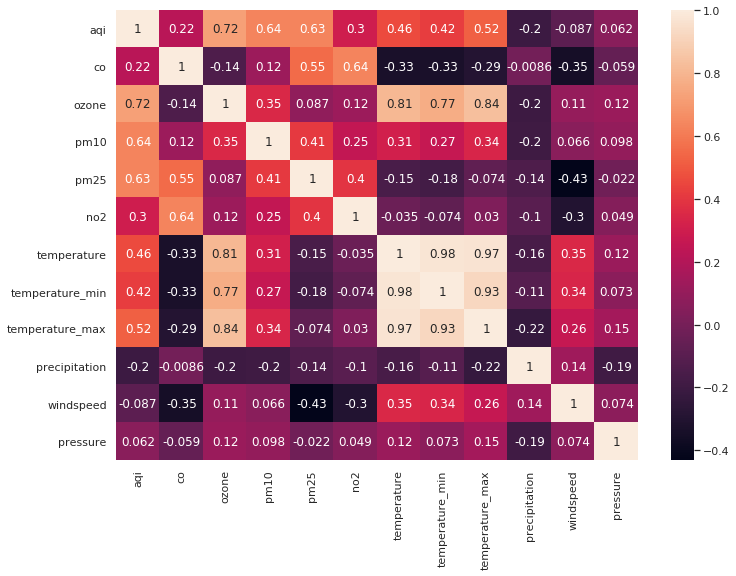

In [493]:
import seaborn as sns
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

# K-Means

In [0]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

[0: 'date', 1: 'aqi', 2: 'main pollutant', 3: 'location', 4: 'location id',
5: 'aqi source', 6: 'co', 7: 'ozone', 8: 'pm10', 9: 'pm25', 10: 'no2', 11: 'temperature', 12: 'temperature_min', 13: 'temperature_max', 14: 'precipitation', 15: 'windspeed', 16: 'pressure']

### Elbow method

In [0]:
def elbow_method():
    Error =[]
    x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    

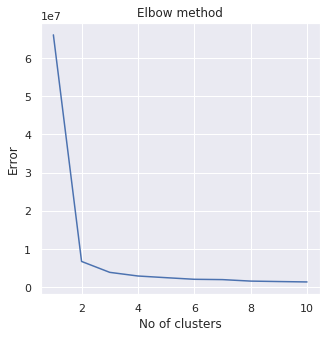

In [496]:
elbow_method()

### K-Means Clustering

In [497]:
x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
y = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]]
col = y.columns

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
plt.figure(figsize=(5,5))
df['cluster'] = y_kmeans

# for i in range(0, 11):
#   for j in range(1, 12):
#     plt.scatter(x[:, i], x[:, j], y_kmeans, c=y_kmeans)
#     plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'red')
#     plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 50, c = 'blue')
#     plt.xlabel(col[i])
#     plt.ylabel(col[j])
#     plt.show()


<Figure size 360x360 with 0 Axes>

In [498]:
# df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
cluster              int32
dtype: object

In [499]:
# Add columns with year, month, and weekday name
# df = df.set_index('date')
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.weekday_name
# # Display a random sampling of 5 rows
df.sample(5, random_state=5)
# select = df[df['cluster'] == 1]
# select.head()

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,cluster
531,06/15/2017,115.0,Ozone,Mojave,06-029-0011,AQS,3.0,115,44.0,54,33.0,27.3,20.0,35.6,0.0,9.4,1013.2,0
461,04/06/2017,87.0,Ozone,Mojave,06-029-0011,AQS,3.0,87,19.0,52,37.0,22.1,14.4,27.8,0.0,9.7,1012.5,0
793,03/04/2018,43.0,Ozone,Maricopa,06-029-0008,AQS,5.0,43,3.0,25,30.0,8.3,3.3,14.4,0.0,6.8,1024.2,0
663,10/25/2017,150.0,Ozone,Edison,06-029-0007,AQS,6.0,150,83.0,82,50.0,22.6,14.4,32.8,0.0,7.6,1014.0,0
654,10/16/2017,133.0,Ozone,Edison,06-029-0007,AQS,7.0,133,75.0,92,60.0,19.8,11.1,28.9,0.0,5.8,1019.4,0


In [0]:
df.loc[df['cluster']==1,'category'] = 'good'
df.loc[df['cluster']==0,'category'] = 'bad'

In [501]:
df.head()

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,cluster,category
0,01/01/2016,148.0,PM2.5,Bakersfield-California,06-029-0014,AQS,8.0,37,52.0,148,23.0,4.4,-2.7,12.8,0.0,6.5,1020.3,0,bad
1,01/02/2016,113.0,PM2.5,Bakersfield-California,06-029-0014,AQS,7.0,37,14.0,113,25.0,7.1,1.1,13.9,0.0,3.6,1017.9,0,bad
2,01/03/2016,80.0,PM2.5,Bakersfield-California,06-029-0014,AQS,7.0,36,9.0,80,28.0,9.6,3.9,20.0,0.0,11.5,1011.5,0,bad
3,01/04/2016,87.0,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5.0,37,8.0,87,28.0,10.6,5.6,18.3,0.0,7.2,1008.8,0,bad
4,01/05/2016,54.0,PM2.5,Bakersfield-California,06-029-0014,AQS,5.0,41,6.0,54,30.0,12.5,8.3,14.4,12.2,7.6,1008.2,0,bad


In [502]:
decTreeDF = df[['aqi', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature','windspeed','pressure','category']]
decTreeDF.shape

(1461, 10)

In [0]:
#decTreeDFX = decTreeDF[['aqi', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature','windspeed','pressure']]
decTreeDFX = decTreeDF[['aqi', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature','windspeed']]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(decTreeDFX, decTreeDF.category, test_size=0.2)

In [505]:
X_train.shape

(1168, 8)

In [506]:
X_test.shape

(293, 8)

In [507]:
X_train.dtypes

aqi            float64
co             float64
ozone            int64
pm10           float64
pm25             int64
no2            float64
temperature    float64
windspeed      float64
dtype: object

In [0]:
import pydotplus
from sklearn import tree
from IPython.display import Image, display
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz

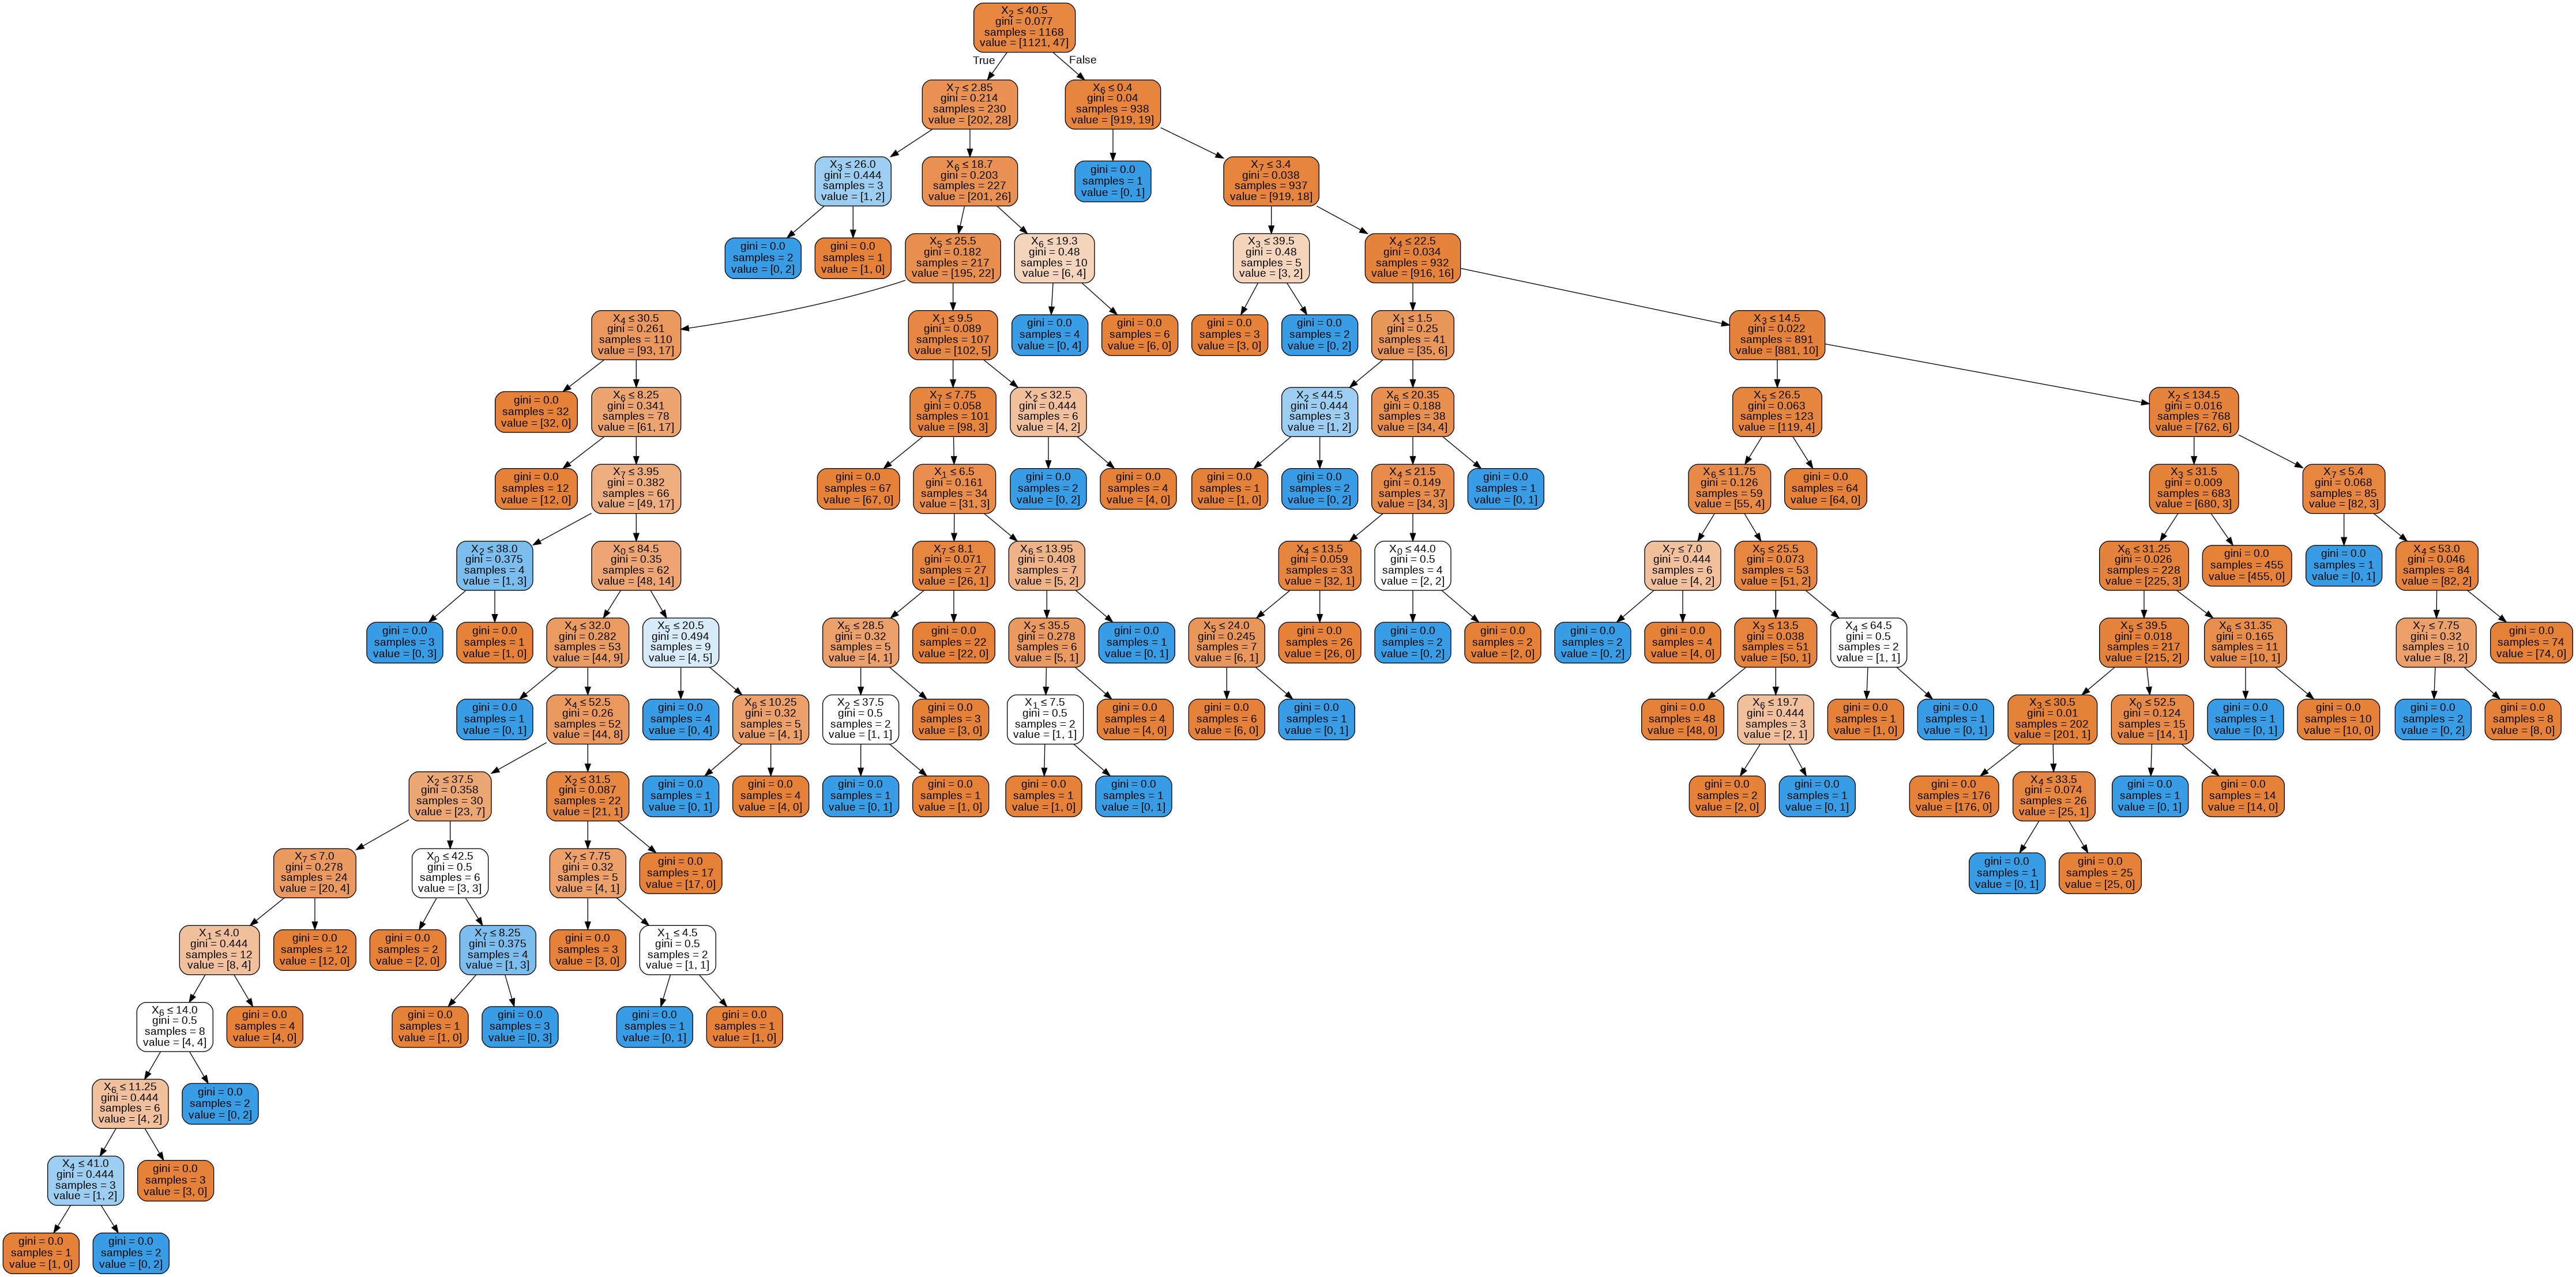

In [509]:
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train, y_train)
# dot_data = tree.export_graphviz(clf, feature_names=['aqi', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature','windspeed','pressure'], class_names=['good','bad'], filled=True, rounded=True)

# graph = pydotplus.graph_from_dot_data(dot_data)

# #prediction = clf.predict([[120, 3, 120, 45, 55, 35, 30, 10, 1000]])
# prediction = clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0]])
# print('Prediction ', prediction) 

# Image(graph.create_png())

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())